In [1]:
import keras
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib
%matplotlib inline

Using TensorFlow backend.


In [2]:
pd.set_option('display.max_columns', None)
df=pd.read_csv('data/Existing_Commercial_Buildings_Energy_Performance_Ordinance_Report.csv', na_values='?')
print (df.shape)
df.head()

(1653, 80)


,Parcel(s),Building Name,Building Address,Postal Code,Full.Address,Floor Area,Property Type - Self Selected,PIM Link,Benchmark 2016 Status,2016 Reason for Exemption,Benchmark 2015 Status,2015 Reason for Exemption,Benchmark 2014 Status,2014 Reason for Exemption,Benchmark 2013 Status,2013 Reason for Exemption,Benchmark 2012 Status,2012 Reason for Exemption,Benchmark 2011 Status,2011 Reason for Exemption,Benchmark 2010 Status,2010 Reason for Exemption,Energy Audit Due Date,Energy Audit Status,Next Audit Due Date,Next Energy Audit Status,2016 ENERGY STAR Score,2016 Site EUI (kBtu/ft2),2016 Source EUI (kBtu/ft2),2016 Percent Better than National Median Site EUI,2016 Percentage Better than National Median Source EUI,2016 Total GHG Emissions (Metric Tons CO2e),2016 Total GHG Emissions Intensity (kgCO2e/ft2),2016 Weather Normalized Site EUI (kBtu/ft2),2016 Weather Normalized Source EUI (kBtu/ft2),2015 ENERGY STAR Score,2015 Site EUI (kBtu/ft2),2015 Source EUI (kBtu/ft2),2015 Percent Better than National Median Site EUI,2015 Percentage Better than National Median Source EUI,2015 Total GHG Emissions (Metric Tons CO2e),2015 Total GHG Emissions Intensity (kgCO2e/ft2),2015 Weather Normalized Site EUI (kBtu/ft2),2015 Weather Normalized Source EUI (kBtu/ft2),2014 ENERGY STAR Score,2014 Site EUI (kBtu/ft2),2014 Source EUI (kBtu/ft2),2014 Percent Better than National Median Site EUI,2014 Percent Better than National Median Source EUI,2014 Total GHG Emissions (Metric Tons CO2e),2014 Total GHG Emissions Intensity (kgCO2e/ft2),2014 Weather Normalized Site EUI (kBtu/ft2),2014 Weather Normalized Source EUI (kBtu/ft2),2013 ENERGY STAR Score,2013 Site EUI (kBtu/ft2),2013 Source EUI (kBtu/ft2),2013 Percent Better than National Median Site EUI,2013 Percent Better than National Median Source EUI,2013 Total GHG Emissions (Metric Tons CO2e),2013 Total GHG Emissions Intensity (kgCO2e/ft2),2013 Weather Normalized Site EUI (kBtu/ft2),2013 Weather Normalized Source EUI (kBtu/ft2),2012 ENERGY STAR Score,2012 Site EUI (kBtu/ft2),2012 Source EUI (kBtu/ft2),2012 Percent Better than National Median Site EUI,2012 Percent Better than National Median Source EUI,2012 Total GHG Emissions (Metric Tons CO2e),2012 Total GHG Emissions Intensity (kgCO2e/ft2),2012 Weather Normalized Site EUI (kBtu/ft2),2012 Weather Normalized Source EUI (kBtu/sq.ft),2011 ENERGY STAR Score,2011 Site EUI (kBtu/ft2),2011 Source EUI (kBtu/ft2),2011 Percent Better than National Median Site EUI,2011 Percent Better than National Median Source EUI,2011 Total GHG Emissions (Metric Tons CO2e),2011 Total GHG Emissions Intensity (kgCO2e/ft2),2011 Weather Normalized Site EUI (kBtu/ft2),2011 Weather Normalized Source EUI (kBtu/ft2)
0,7521/002,Diamond Heights Shopping Center - Building B2,"5262, 5264, 5268 Diamond Heights Blvd.",94131.0,"5262 5264\nSan Francisco, CA 94131\n",10728.0,Retail Store,http://propertymap.sfplanning.org/?&search=752...,Complied,NaN,Complied,NaN,Complied,NaN,Complied,NaN,Complied,NaN,Violation - Did Not Report,NaN,Violation - Did Not Report,NaN,2013-04-01T00:00:00,Complied,NaN,NaN,NaN,48.5,148.8,20.9,20.9,44.6,4.2,49.0,149.3,NaN,48.9,149.6,21.5,21.5,42.2,3.9,49.1,149.8,NaN,50.7,155.0,25.9,25.9,43.8,4.1,51.4,155.7,NaN,50.8,153.4,24.6,24.6,43.6,4.1,50.1,152.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0667/011,"1430. 1450, 1480 Van Ness Ave",1430 Van Ness,94109.0,"1430 Van\nSan Francisco, CA 94109\n",28300.0,Retail Store,http://propertymap.sfplanning.org/?&search=066...,Violation - Did Not Report,NaN,Complied,NaN,Complied,NaN,Complied,NaN,Complied,NaN,Complied,NaN,Exempt,Exempt - SqFt Not Subject This Year,2014-04-01T00:00:00,Complied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.9,87.3,-23.7,-23.7,37.9,2.3,27.9,87.3,NaN,28.9,90.7,-20.8,-20.8,39.4,2.4,28.9,90.7,NaN,32.7,99.0,-13.5,-13.5,43.8,2.6,32.7,99.0,NaN,25.5,75.3,-34.3,-34.2,33.70,2.0,25.5,75.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0742/015,700-710 Van Ness,700 Van Ness,94102.0,"700 Van\nSan 

In [3]:
df.describe()

,Postal Code,Floor Area,2016 ENERGY STAR Score,2016 Site EUI (kBtu/ft2),2016 Source EUI (kBtu/ft2),2016 Percent Better than National Median Site EUI,2016 Percentage Better than National Median Source EUI,2016 Total GHG Emissions (Metric Tons CO2e),2016 Total GHG Emissions Intensity (kgCO2e/ft2),2016 Weather Normalized Site EUI (kBtu/ft2),2016 Weather Normalized Source EUI (kBtu/ft2),2015 ENERGY STAR Score,2015 Site EUI (kBtu/ft2),2015 Source EUI (kBtu/ft2),2015 Percent Better than National Median Site EUI,2015 Percentage Better than National Median Source EUI,2015 Total GHG Emissions (Metric Tons CO2e),2015 Total GHG Emissions Intensity (kgCO2e/ft2),2015 Weather Normalized Site EUI (kBtu/ft2),2015 Weather Normalized Source EUI (kBtu/ft2),2014 ENERGY STAR Score,2014 Site EUI (kBtu/ft2),2014 Source EUI (kBtu/ft2),2014 Percent Better than National Median Site EUI,2014 Percent Better than National Median Source EUI,2014 Total GHG Emissions (Metric Tons CO2e),2014 Total GHG Emissions Intensity (kgCO2e/ft2),2014 Weather Normalized Site EUI (kBtu/ft2),2014 Weather Normalized Source EUI (kBtu/ft2),2013 ENERGY STAR Score,2013 Site EUI (kBtu/ft2),2013 Source EUI (kBtu/ft2),2013 Percent Better than National Median Site EUI,2013 Percent Better than National Median Source EUI,2013 Total GHG Emissions (Metric Tons CO2e),2013 Total GHG Emissions Intensity (kgCO2e/ft2),2013 Weather Normalized Site EUI (kBtu/ft2),2013 Weather Normalized Source EUI (kBtu/ft2),2012 ENERGY STAR Score,2012 Site EUI (kBtu/ft2),2012 Source EUI (kBtu/ft2),2012 Percent Better than National Median Site EUI,2012 Percent Better than National Median Source EUI,2012 Total GHG Emissions (Metric Tons CO2e),2012 Total GHG Emissions Intensity (kgCO2e/ft2),2012 Weather Normalized Site EUI (kBtu/ft2),2012 Weather Normalized Source EUI (kBtu/sq.ft),2011 ENERGY STAR Score,2011 Site EUI (kBtu/ft2),2011 Source EUI (kBtu/ft2),2011 Percent Better than National Median Site EUI,2011 Percent Better than National Median Source EUI,2011 Total GHG Emissions (Metric Tons CO2e),2011 Total GHG Emissions Intensity (kgCO2e/ft2),2011 Weather Normalized Site EUI (kBtu/ft2),2011 Weather Normalized Source EUI (kBtu/ft2)
count,1652.000000,1.649000e+03,762.000000,1132.000000,1132.000000,1114.000000,1114.000000,1131.000000,1131.000000,1108.000000,1110.000000,831.000000,1210.000000,1210.000000,1087.000000,1087.000000,1209.000000,1209.000000,1193.000000,1193.000000,810.000000,1189.000000,1189.000000,1126.000000,1126.000000,1188.000000,1188.000000,1170.000000,1170.000000,765.000000,1112.000000,1112.000000,1067.000000,1067.000000,1111.000000,1110.000000,1096.000000,1096.000000,478.000000,651.000000,651.000000,639.000000,137.000000,6.480000e+02,147.000000,647.000000,647.000000,336.000000,421.000000,34.000000,413.000000,35.000000,4.180000e+02,35.000000,421.000000,35.000000
mean,94110.633777,9.803919e+04,73.132546,67.693198,155.883922,-12.362567,-12.362567,517.703802,4.957118,74.236643,149.373964,72.883273,68.181570,159.024132,-11.862649,-11.862741,507.943838,4.831514,69.166303,160.174267,70.565432,70.173423,161.985702,44.893783,44.893783,510.308418,4.945539,72.066752,163.896496,71.388235,98.095054,191.149011,18.661762,18.670665,685.046895,7.284595,98.479562,192.146077,74.016736,246.614900,408.684793,185.095618,93.779562,9.865769e+03,18.529252,244.289490,407.055641,76.889881,351.691211,133.729412,238.427845,-26.645714,1.555706e+04,4.051429,347.577197,2122.211429
std,9.329471,1.873952e+05,26.054820,95.583555,228.707235,87.796847,87.796847,1220.049525,6.921836,109.713887,226.709156,26.267110,96.085919,222.498553,93.054207,93.054242,1271.597260,6.625444,96.559536,223.390595,26.943080,142.706765,251.849651,1866.191538,1866.191538,1263.053683,8.723704,143.751518,252.890069,25.562153,693.533573,840.810071,666.624962,666.825748,5280.621451,59.438348,701.847380,850.782287,25.177519,2342.258772,2915.199971,2464.829478,1326.613909,2.143906e+05,161.552977,2304.854056,2871.764102,21.789832,3361.869735,90.851816,2999.2189

What does this data look like?


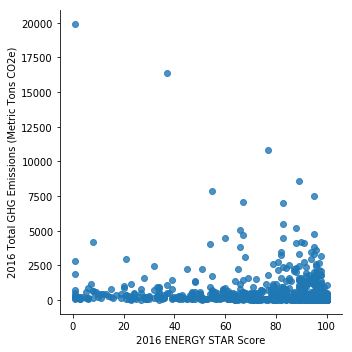

In [4]:
print ("What does this data look like?")
sbn.lmplot('2016 ENERGY STAR Score',\
           '2016 Total GHG Emissions (Metric Tons CO2e)',\
           data=df, fit_reg=False)

#The Energy Star Score seems to have little influence from the raw amount of emissions produced.

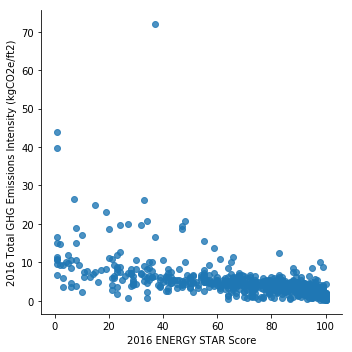

In [5]:
sbn.lmplot('2016 ENERGY STAR Score',\
           '2016 Total GHG Emissions Intensity (kgCO2e/ft2)',\
           data=df, fit_reg=False)

#Obviously the amount of emissions per square foot of space is an important facet in determining the Energy Star Score.

There are clearly a few exceptions, such as the data point with > 70 Intensity

In [6]:
df[df["2016 Total GHG Emissions Intensity (kgCO2e/ft2)"]>70.].head()

,Parcel(s),Building Name,Building Address,Postal Code,Full.Address,Floor Area,Property Type - Self Selected,PIM Link,Benchmark 2016 Status,2016 Reason for Exemption,Benchmark 2015 Status,2015 Reason for Exemption,Benchmark 2014 Status,2014 Reason for Exemption,Benchmark 2013 Status,2013 Reason for Exemption,Benchmark 2012 Status,2012 Reason for Exemption,Benchmark 2011 Status,2011 Reason for Exemption,Benchmark 2010 Status,2010 Reason for Exemption,Energy Audit Due Date,Energy Audit Status,Next Audit Due Date,Next Energy Audit Status,2016 ENERGY STAR Score,2016 Site EUI (kBtu/ft2),2016 Source EUI (kBtu/ft2),2016 Percent Better than National Median Site EUI,2016 Percentage Better than National Median Source EUI,2016 Total GHG Emissions (Metric Tons CO2e),2016 Total GHG Emissions Intensity (kgCO2e/ft2),2016 Weather Normalized Site EUI (kBtu/ft2),2016 Weather Normalized Source EUI (kBtu/ft2),2015 ENERGY STAR Score,2015 Site EUI (kBtu/ft2),2015 Source EUI (kBtu/ft2),2015 Percent Better than National Median Site EUI,2015 Percentage Better than National Median Source EUI,2015 Total GHG Emissions (Metric Tons CO2e),2015 Total GHG Emissions Intensity (kgCO2e/ft2),2015 Weather Normalized Site EUI (kBtu/ft2),2015 Weather Normalized Source EUI (kBtu/ft2),2014 ENERGY STAR Score,2014 Site EUI (kBtu/ft2),2014 Source EUI (kBtu/ft2),2014 Percent Better than National Median Site EUI,2014 Percent Better than National Median Source EUI,2014 Total GHG Emissions (Metric Tons CO2e),2014 Total GHG Emissions Intensity (kgCO2e/ft2),2014 Weather Normalized Site EUI (kBtu/ft2),2014 Weather Normalized Source EUI (kBtu/ft2),2013 ENERGY STAR Score,2013 Site EUI (kBtu/ft2),2013 Source EUI (kBtu/ft2),2013 Percent Better than National Median Site EUI,2013 Percent Better than National Median Source EUI,2013 Total GHG Emissions (Metric Tons CO2e),2013 Total GHG Emissions Intensity (kgCO2e/ft2),2013 Weather Normalized Site EUI (kBtu/ft2),2013 Weather Normalized Source EUI (kBtu/ft2),2012 ENERGY STAR Score,2012 Site EUI (kBtu/ft2),2012 Source EUI (kBtu/ft2),2012 Percent Better than National Median Site EUI,2012 Percent Better than National Median Source EUI,2012 Total GHG Emissions (Metric Tons CO2e),2012 Total GHG Emissions Intensity (kgCO2e/ft2),2012 Weather Normalized Site EUI (kBtu/ft2),2012 Weather Normalized Source EUI (kBtu/sq.ft),2011 ENERGY STAR Score,2011 Site EUI (kBtu/ft2),2011 Source EUI (kBtu/ft2),2011 Percent Better than National Median Site EUI,2011 Percent Better than National Median Source EUI,2011 Total GHG Emissions (Metric Tons CO2e),2011 Total GHG Emissions Intensity (kgCO2e/ft2),2011 Weather Normalized Site EUI (kBtu/ft2),2011 Weather Normalized Source EUI (kBtu/ft2)
1357,3745/008,365 MAIN ST,365 MAIN ST,94105.0,"365 MAIN ST\nSan Francisco, CA 94105\n(37.7884...",265981.0,Data Center,http://propertymap.sfplanning.org/?&search=374...,Complied,NaN,Complied,NaN,Complied,NaN,Violation - Insufficient Data,NaN,Violation - Insufficient Data,NaN,Violation - Did Not Report,NaN,Violation - Did Not Report,NaN,2015-04-01T00:00:00,Complied,NaN,NaN,37.0,951.1,2979.4,4.9,4.9,16370.9,72.1,951.1,2979.4,100.0,1045.9,3284.0,-96.5,-96.5,19355.7,85.3,1045.9,3284.0,100.0,1037.3,3257.1,-94.2,-94.2,19197.0,84.6,1037.3,3257.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1365,3787/005,630 3RD ST,630 3RD ST,94107.0,"630 3RD ST\nSan Francisco, CA 94107\n(37.77969...",40340.0,Data Center,http://propertymap.sfplanning.org/?&search=378...,Complied,NaN,Complied,NaN,Complied,NaN,Violation - Did Not Report,NaN,Complied,NaN,Complied,NaN,Exempt,Exempt - SqFt Not Subject This Year,2013-04-01T00:00:00,Complied,2018-04-01T00:00:00,Upcoming,NaN,1608.2,5049.8,NaN,NaN,5629.2,139.5,1608.2,5049.8,NaN,1412.1,4434.1,NaN,NaN,4644.7,115.1,1412.1,4434.1,1.0,1479.7,4646.4,62531.9,62531.9,4867.1,120.7,1479.7,4646.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1403,48

2/3 of these are Data Centers, which will use large amounts of electricity.

At least there is a decline!


C:\Users\j\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


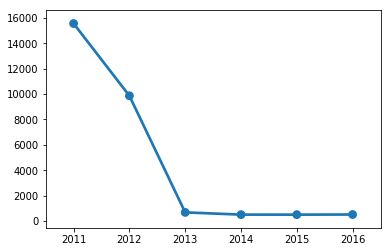

In [7]:
yearlyGHGCols=[str(x)+' Total GHG Emissions (Metric Tons CO2e)' for x in range(2011,2017,1)]
years=[x for x in range(2011,2017,1)]
print ("At least there is a decline!")
sbn.pointplot(x=years, y=df[yearlyGHGCols].mean().as_matrix())